# CS 6220 Final Project

# Analyzing Swiggy Restaurant Catalog Data

## Group: Amber
### Members: Sudhanva Narayana, Shreyas Prasad, Matthew Chan

## Table of Contents

* [Quick Inspection of the Data](#quick-inspection-of-the-data)
* [Important Features that could be useful](#important-features-that-could-be-useful)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('swiggy.csv')

## Quick Inspection of the Data

In [3]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [4]:
df.tail()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [6]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


In [7]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

## Important Features that could be useful

- **city**: Location can be a major aspect of how restaurants and their properties can change
- **rating**: Could be a major factor in deciding the quality of the restaurant
- **rating_count**: Could be a major factor in deciding the authenticity of the ratings
- **cost**: Important feature for deciding how to price the restaurants
- **cuisine**: Could be a major factor in categorizing the restaurants based on trends and type of food

In [8]:
def preprocess_city(entry):
    # Split the entry by comma separator
    values = entry.split(',')
    
    # Check number of values and modify as necessary
    if len(values) == 1:
        # Prepend the same value twice
        values = [values[0], values[0], values[0]]
    elif len(values) == 2:
        # Prepend the first value to the list
        values = [values[0]] + values
    
    # Join the values back into a comma separated string
    return ','.join(values)

def preprocess_cuisine(entry):
    values = entry.split(',')

    if len(values) == 1:
        values = [values[0]] + values
    
        # Join the values back into a comma separated string
        return ','.join(values)
    return ','.join(values)

In [9]:
df['city'].value_counts()

Bikaner                 1666
Noida-1                 1428
Indirapuram,Delhi       1279
BTM,Bangalore           1161
Rohini,Delhi            1136
                        ... 
Alwarpet,Chennai           1
Naharlagun                 1
Mahim Dadar,Mumbai         1
Starbucks_BKC,Mumbai       1
Rangpo                     1
Name: city, Length: 821, dtype: int64

In [10]:
df['city'][df['city'].isna()]

Series([], Name: city, dtype: object)

### Imputing data

In [11]:
df['city'] = df['city'].apply(preprocess_city)

In [12]:
df['city'].value_counts()

Bikaner,Bikaner,Bikaner               1666
Noida-1,Noida-1,Noida-1               1428
Indirapuram,Indirapuram,Delhi         1279
BTM,BTM,Bangalore                     1161
Rohini,Rohini,Delhi                   1136
                                      ... 
Alwarpet,Alwarpet,Chennai                1
Naharlagun,Naharlagun,Naharlagun         1
Mahim Dadar,Mahim Dadar,Mumbai           1
Starbucks_BKC,Starbucks_BKC,Mumbai       1
Rangpo,Rangpo,Rangpo                     1
Name: city, Length: 821, dtype: int64

#### Spitting the city column into sub_area, area and city

In [13]:
df[['sub_area', 'area', 'city']] = df['city'].str.split(',', expand=True)

In [14]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,sub_area,area
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar,Abohar
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar,Abohar
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar,Abohar
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar,Abohar
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar,Abohar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,Yavatmal,Yavatmal
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,Yavatmal,Yavatmal
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,Yavatmal,Yavatmal
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,Yavatmal,Yavatmal


### Quick look after imputation

In [15]:
df[['sub_area','area','city']].value_counts()

sub_area        area            city     
Bikaner         Bikaner         Bikaner      1666
Noida-1         Noida-1         Noida-1      1428
Indirapuram     Indirapuram     Delhi        1279
BTM             BTM             Bangalore    1161
Rohini          Rohini          Delhi        1136
                                             ... 
BBK_MayurVihar  BBK_MayurVihar  Delhi           1
Mahim Dadar     Mahim Dadar     Mumbai          1
Rangpo          Rangpo          Rangpo          1
Manali          Manali          Manali          1
Kohima          Kohima          Kohima          1
Length: 821, dtype: int64

### Visualising Ratings

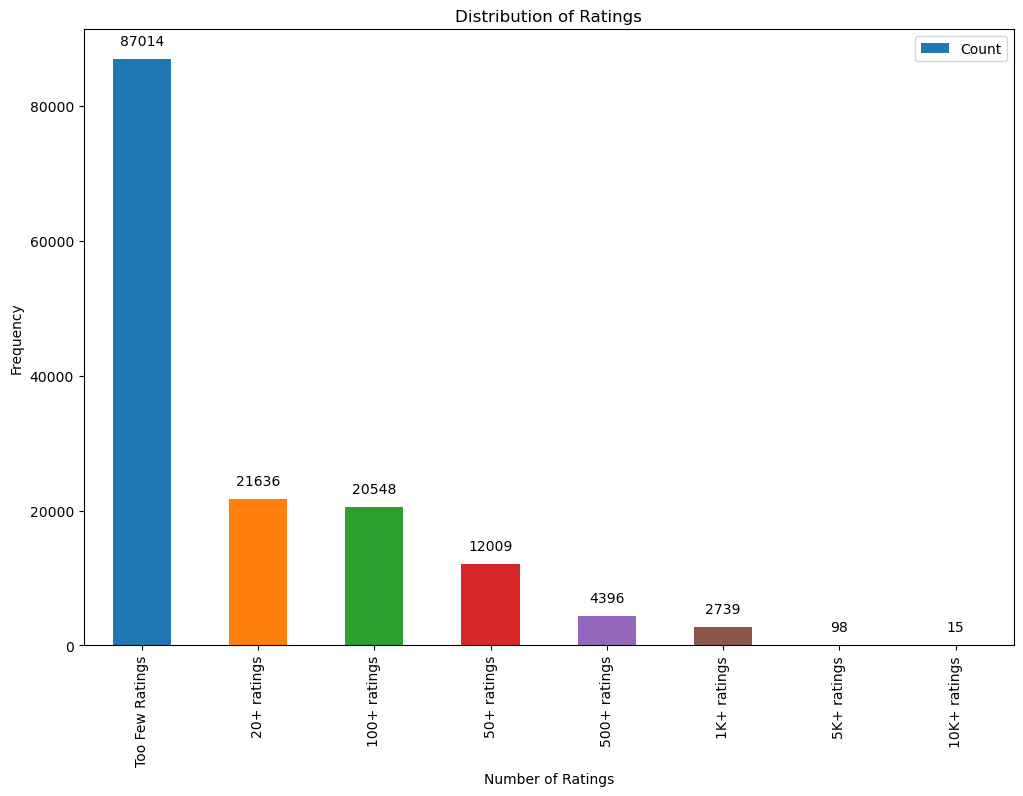

In [16]:
# Define a colormap
cmap = sns.color_palette('tab10', len(df['rating_count'].value_counts()))

# Create a bar plot of the rating counts
ax = df['rating_count'].value_counts().plot(kind='bar', color=cmap, figsize=(12, 8))

# Set the title of the plot
ax.set_title('Distribution of Ratings')

# Set the label for the x-axis
ax.set_xlabel('Number of Ratings')

# Set the label for the y-axis
ax.set_ylabel('Frequency')

# Add a legend to the plot
ax.legend(['Count'], loc='upper right')

# Display the values on top of the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=8)

# Display the plot
plt.show()

In [17]:
df['cost'] = df['cost'].str.slice(start=1).astype('float')

In [18]:
def filter_outliers(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    filtered = df[column_name][(df[column_name] > mean - 2 * std) & (df[column_name] < mean + 2 * std)]
    return filtered

### Visualising Cost

In [19]:
df['cost'] = filter_outliers(df, 'cost')

In [20]:
df['cost'] = df['cost'].fillna(df['cost'].median())

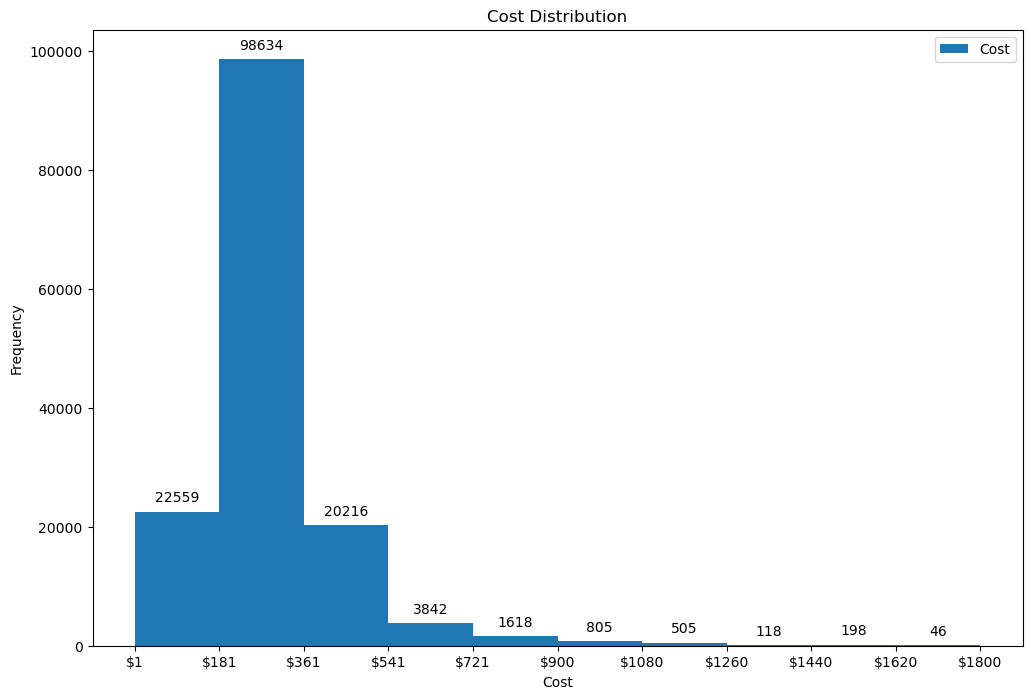

In [21]:
# Set up the histogram plot
fig, ax = plt.subplots(figsize=(12, 8))
n, bins, patches = ax.hist(df['cost'], bins=10)

# Customize plot details
ax.set_title('Cost Distribution')
ax.set_xlabel('Cost')
ax.set_ylabel('Frequency')
ax.set_xticks(bins)
ax.set_xticklabels(['${:.0f}'.format(b) for b in bins])
ax.legend(['Cost'])

# Add value labels to the top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    ax.annotate('{:.0f}'.format(y), (x, y), xytext=(0, 5), 
                textcoords='offset points', ha='center', va='bottom')

# Display the plot
plt.show()

### Analsing Cuisime

In [22]:
df['cuisine']

0                   Beverages,Pizzas
1                      Sweets,Bakery
2                          Beverages
3                   Fast Food,Indian
4         Italian-American,Fast Food
                     ...            
148536              Fast Food,Snacks
148537                        Pizzas
148538              Fast Food,Snacks
148539                   Continental
148540                        Pizzas
Name: cuisine, Length: 148541, dtype: object

In [23]:
df['cuisine'].value_counts()

North Indian,Chinese         6471
Indian                       6414
Chinese                      5051
North Indian                 4775
Indian,Chinese               4374
                             ... 
Vietnamese,Pan-Asian            1
Healthy Food,Pan-Asian          1
Home Food,Naga                  1
Korean,Desserts                 1
Barbecue,Italian-American       1
Name: cuisine, Length: 2132, dtype: int64

In [24]:
df = df.dropna(subset=['cuisine']).copy()

In [25]:
df.loc[:, 'cuisine'] = df['cuisine'].apply(preprocess_cuisine)

In [26]:
df['cuisine']

0                   Beverages,Pizzas
1                      Sweets,Bakery
2                Beverages,Beverages
3                   Fast Food,Indian
4         Italian-American,Fast Food
                     ...            
148536              Fast Food,Snacks
148537                 Pizzas,Pizzas
148538              Fast Food,Snacks
148539       Continental,Continental
148540                 Pizzas,Pizzas
Name: cuisine, Length: 148442, dtype: object

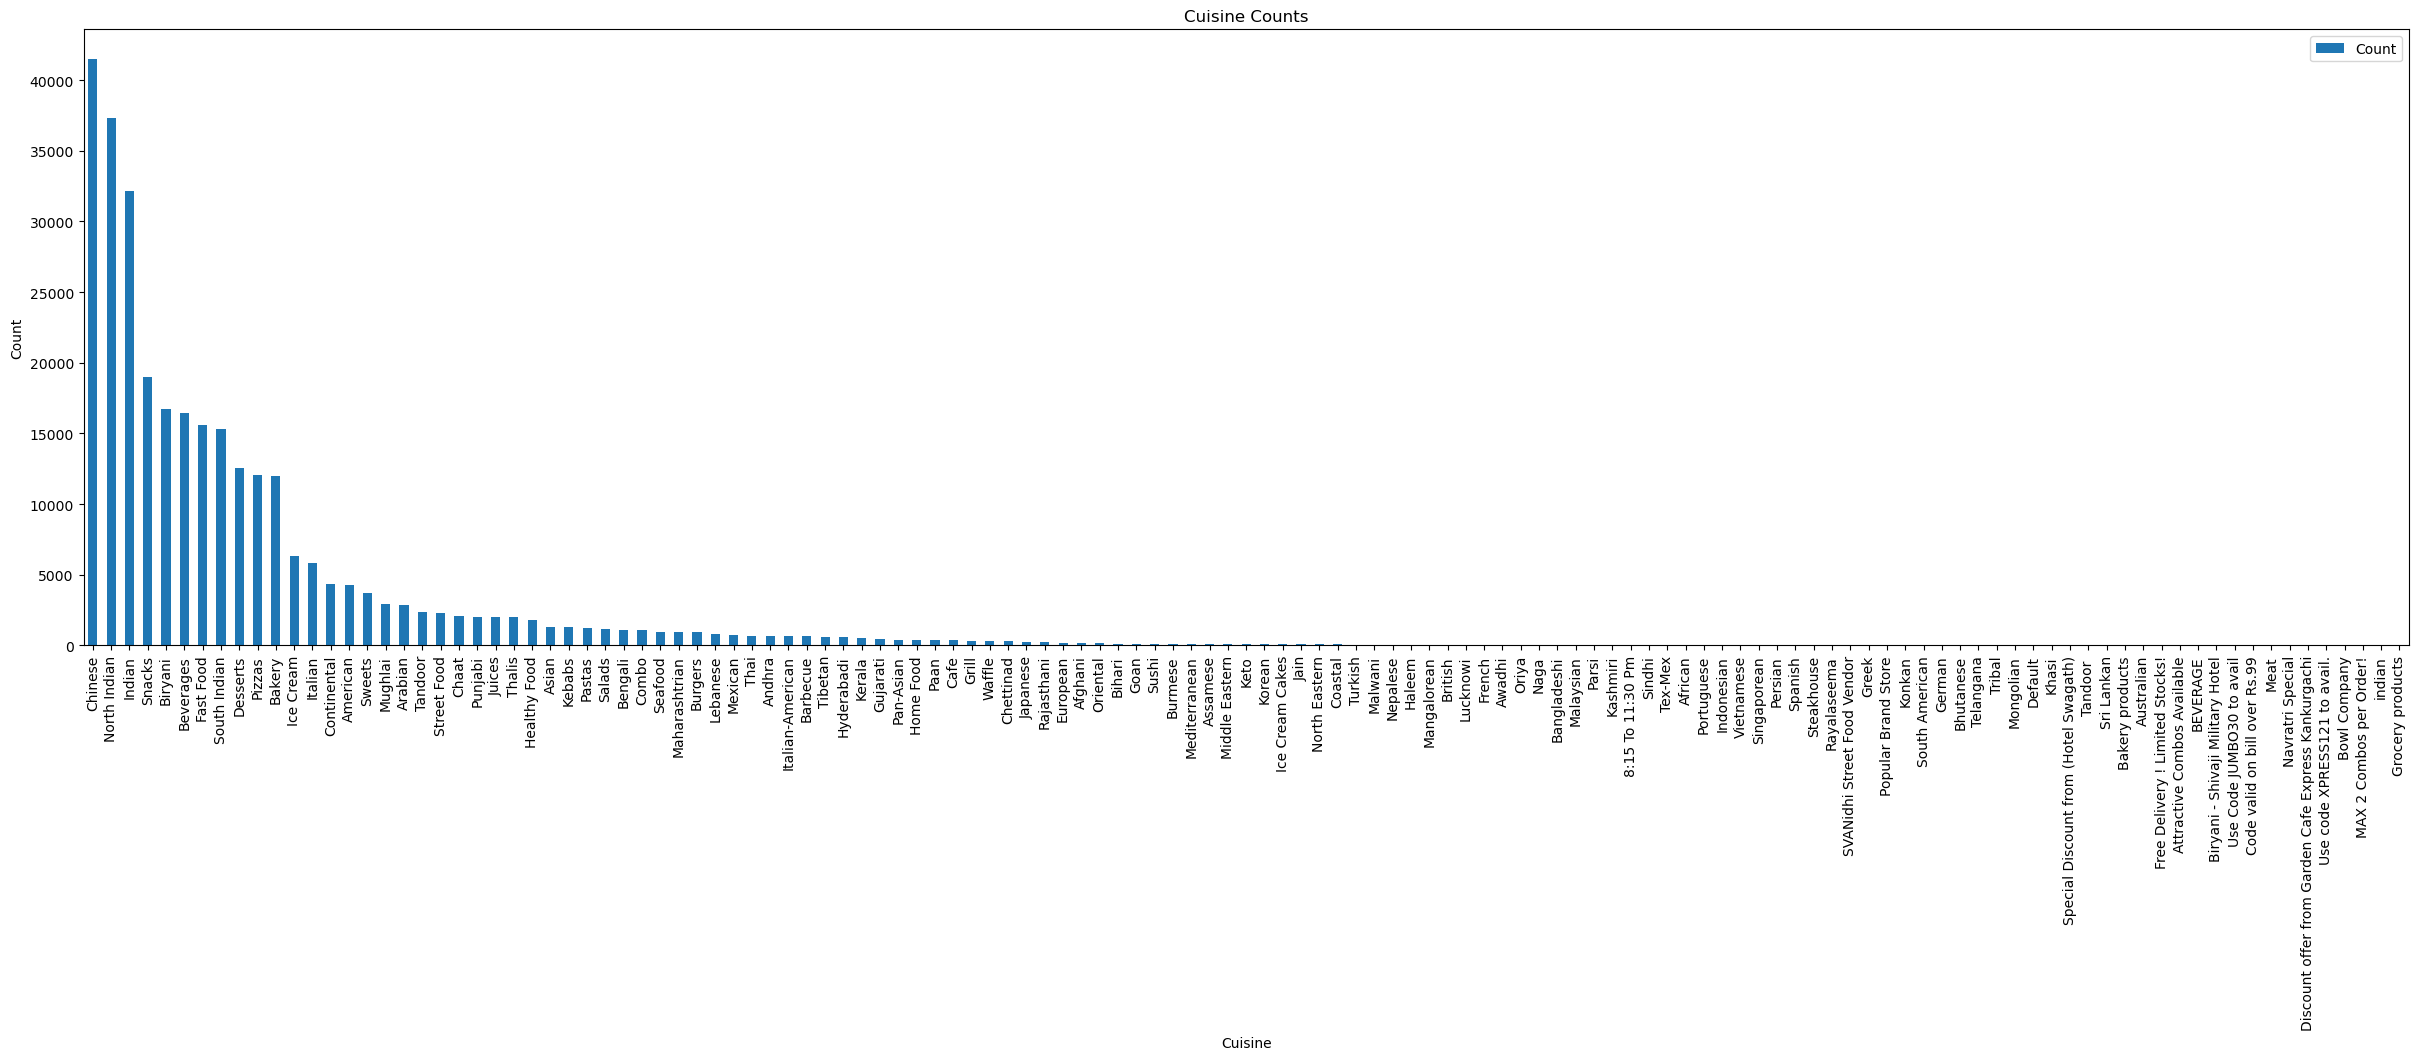

In [27]:
cuisine_counts = df['cuisine'].str.split(',', expand=True).stack().value_counts()

# Set up the bar plot
fig, ax = plt.subplots(figsize=(30,8))
cuisine_counts.plot(kind='bar')

# Customize plot details
ax.set_title('Cuisine Counts')
ax.set_xlabel('Cuisine')
ax.set_ylabel('Count')
ax.legend(['Count'])

# Display the plot
plt.show()

In [28]:
not_cuisines = [
    '8:15 To 11:30 Pm',
    'Tex-Mex',
    'SVANidhi Street Food Vendor',
    'Popular Brand Store',    'Bhutanese',
    'Default',
    'Special Discount from (Hotel Swagath)',
    'Bakery products',
    'Free Delivery ! Limited Stocks!',
    'Attractive Combos Available',
    'BEVERAGE',
    'Biryani - Shivaji Military Hotel',
    'Use Code JUMBO30 to avail',
    'Code valid on bill over Rs.99',
    'Meat',
    'Navratri Special',
    'Discount offer from Garden Cafe Express Kankurgachi',
    'Use code XPRESS121 to avail.',
    'Bowl Company',
    'MAX 2 Combos per Order!',
    'Grocery products'
]

In [29]:
# Set a minimum threshold frequency
min_frequency = 0.01

# Count the frequency of each cuisine
cuisine_counts = df['cuisine'].str.split(',', expand=True).stack().value_counts()

# Filter out infrequent cuisines
frequent_cuisines = cuisine_counts[cuisine_counts >= min_frequency * len(df)]

In [30]:
frequent_cuisines

Chinese         41515
North Indian    37312
Indian          32130
Snacks          19019
Biryani         16750
Beverages       16427
Fast Food       15563
South Indian    15317
Desserts        12529
Pizzas          12060
Bakery          11970
Ice Cream        6354
Italian          5802
Continental      4319
American         4279
Sweets           3690
Mughlai          2934
Arabian          2870
Tandoor          2388
Street Food      2270
Chaat            2066
Punjabi          2004
Juices           1997
Thalis           1971
Healthy Food     1769
dtype: int64

In [31]:
df = df[df['cuisine'].str.split(',', expand=True).isin(frequent_cuisines.index).any(axis=1)]

In [32]:
df = df[~df['cuisine'].str.split(',', expand=True).isin(not_cuisines).any(axis=1)]

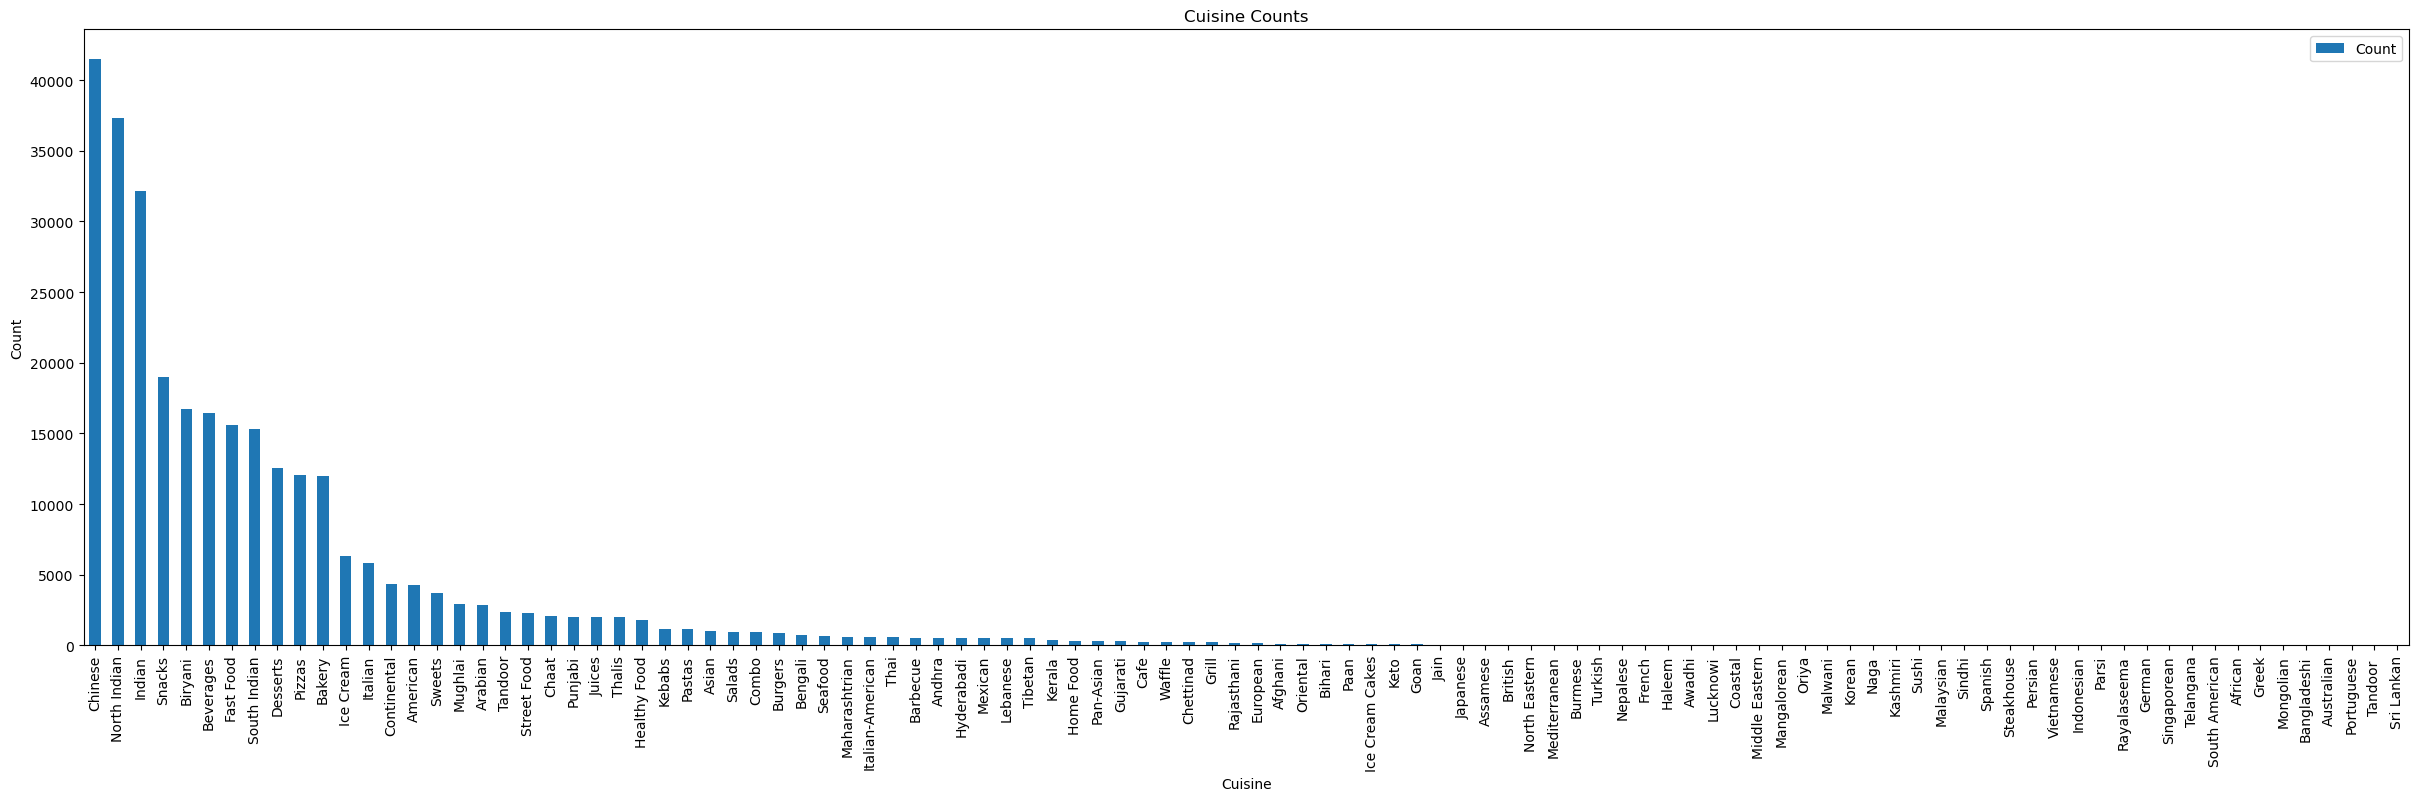

In [33]:
cuisine_counts = df['cuisine'].str.split(',', expand=True).stack().value_counts()

# Set up the bar plot
fig, ax = plt.subplots(figsize=(30,8))
cuisine_counts.plot(kind='bar')

# Customize plot details
ax.set_title('Cuisine Counts')
ax.set_xlabel('Cuisine')
ax.set_ylabel('Count')
ax.legend(['Count'])

# Display the plot
plt.show()

In [34]:
df[['cuisine1', 'cuisine2']] = df['cuisine'].str.split(',', expand=True)
df.drop(columns=['cuisine'], inplace=True)

In [35]:
df.head()

,id,name,city,rating,rating_count,cost,lic_no,link,address,menu,sub_area,area,cuisine1,cuisine2
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,200.0,22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar,Abohar,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar,Abohar,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar,Abohar,Beverages,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar,Abohar,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,250.0,12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar,Abohar,Italian-American,Fast Food


In [36]:
df['rating'] = df['rating'].replace('--', '0')

In [37]:
df['rating'] = df['rating'].astype('float')

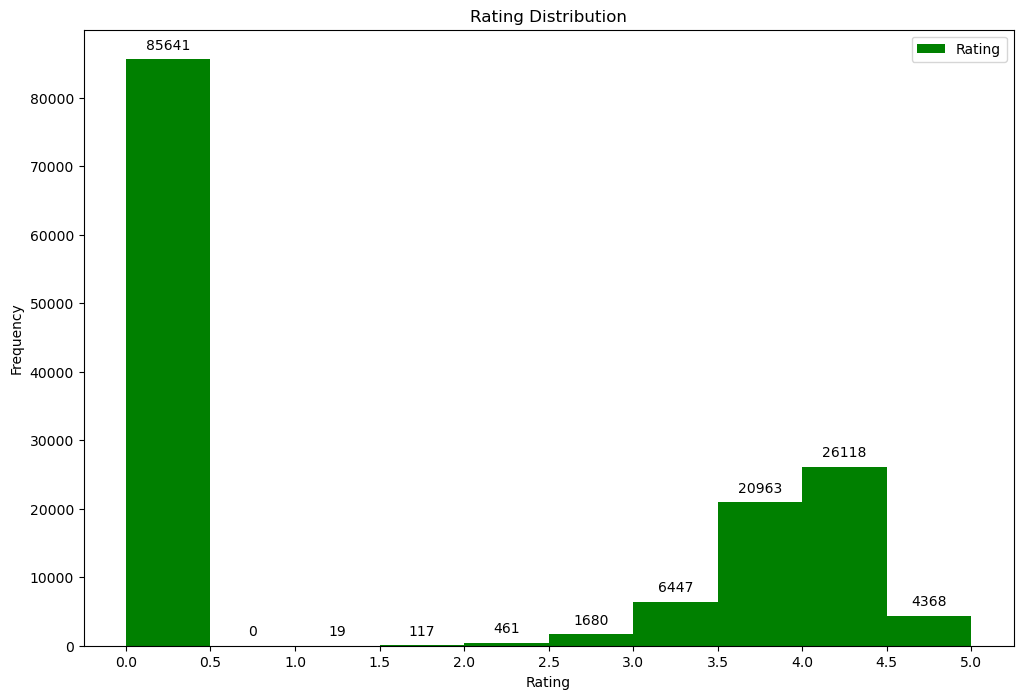

In [38]:
# Set up the histogram plot
fig, ax = plt.subplots(figsize=(12, 8))
n, bins, patches = ax.hist(df['rating'], bins=10, color='green')

# Customize plot details
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_xticks(bins)
ax.legend(['Rating'])

# Add value labels to the top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    ax.annotate('{:.0f}'.format(y), (x, y), xytext=(0, 5), 
                textcoords='offset points', ha='center', va='bottom')

# Display the plot
plt.show()

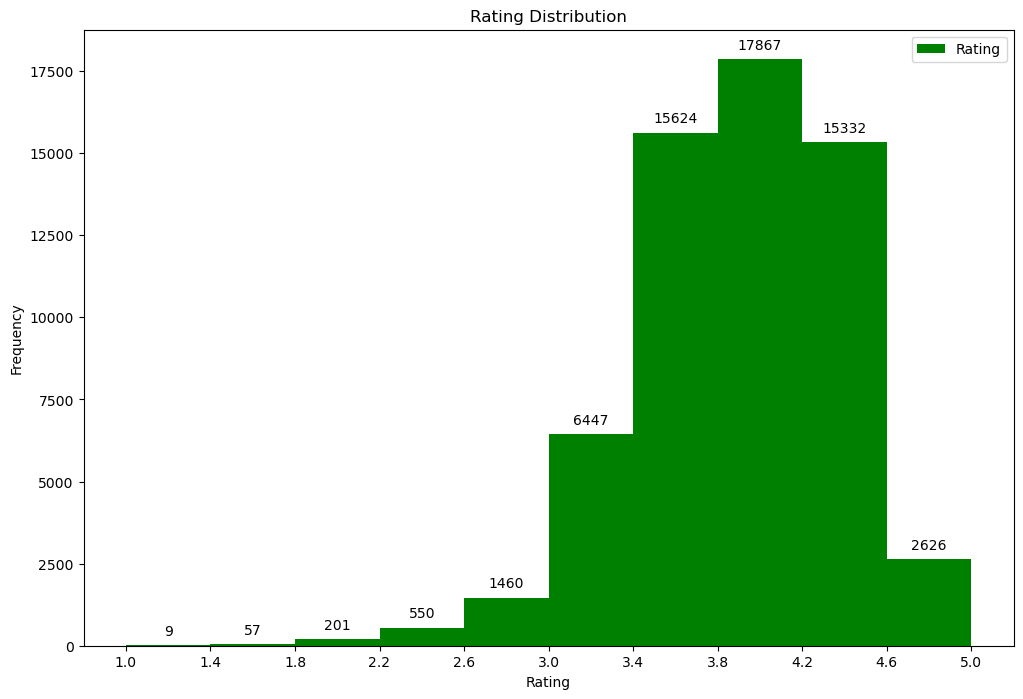

In [39]:
# Set up the histogram plot
fig, ax = plt.subplots(figsize=(12, 8))
n, bins, patches = ax.hist(df['rating'][df['rating'] != 0], bins=10, color='green')

# Customize plot details
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_xticks(bins)
ax.legend(['Rating'])

# Add value labels to the top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    ax.annotate('{:.0f}'.format(y), (x, y), xytext=(0, 5), 
                textcoords='offset points', ha='center', va='bottom')

# Display the plot
plt.show()

In [40]:
df.head()

,id,name,city,rating,rating_count,cost,lic_no,link,address,menu,sub_area,area,cuisine1,cuisine2
0,567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,200.0,22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar,Abohar,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar,Abohar,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar,Abohar,Beverages,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar,Abohar,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,0.0,Too Few Ratings,250.0,12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar,Abohar,Italian-American,Fast Food


In [41]:
df.to_csv('swiggy-preprocessed.csv', index=False)